In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# LOADING DATSET

In [2]:
df=pd.read_csv('political-books-edges.csv')
df.head()

,Source,Destination,Weight
0,1,0,1
1,2,0,1
2,3,0,1
3,3,1,1
4,4,0,1


# CREATING GRAPH FROM THE DATASET

In [3]:
def undirected_graph(data):
    edges=[]
    for i in range(len(df)):
        edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
    G=nx.Graph()
    G.add_weighted_edges_from(edges)
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):d["weight"] for u,v,d in G.edges(data=True)})
    nx.draw_networkx_labels(G, pos)
    plt.axis('off')
    plt.show()
    nodes=list(G.nodes())
    print('Nodes of the above graph are:-\n',nodes)
    print('Total no of Nodes are:-',len(nodes))
    edges=list(G.edges())
    print('Edges of the above graph are:-\n',edges)
    print('Total no of Edges are:-\n',len(edges))
    print('Degree of nodes:-\n',G.degree( weight='weight'))
    degree=dict(G.degree( weight='weight'))
    degree_max=max(list(degree.values()))
    value = {i for i in degree if degree[i]==degree_max}
    print("max degree node:",value)
    degree_min=min(list(degree.values()))
    value = {i for i in degree if degree[i]==degree_min}
    print("min degree node:",value)
    return G

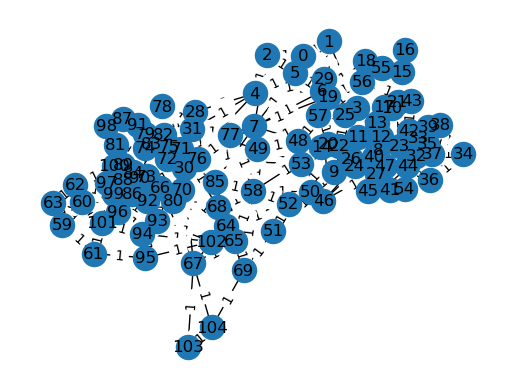

Nodes of the above graph are:-
 [1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104]
Total no of Nodes are:- 105
Edges of the above graph are:-
 [(1, 0), (1, 3), (1, 5), (1, 6), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (2, 4), (2, 5), (2, 7), (3, 5), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (3, 26), (3, 27), (4, 5), (4, 6), (4, 28), (4, 29), (4, 30), (4, 31), (5, 6), (5, 7), (6, 7), (6, 10), (6, 12), (6, 18), (6, 22), (6, 25), (6, 29), (7, 14), (7, 30), (7, 58), (7, 71), (7, 85), (8, 9), (8, 10), (8, 11), (8, 12),

In [4]:
G=undirected_graph(df)

# FUNCTION FOR DETECTING CLIQUES, N-CLIQUES, N-CLANS, NCLUBS

In [5]:
def detect_cliques(graph):
    cliques = list(nx.find_cliques(graph))
    return cliques

In [6]:
def detect_n_cliques(graph, n):
    cliques = list(nx.find_cliques(graph))
    n_cliques = [clique for clique in cliques if len(clique) >= n]
    return n_cliques

In [7]:
def detect_n_clans(n_cliques):
    n_clans = []
    for clique1 in n_cliques:
        for clique2 in n_cliques:
            if clique1 != clique2 and set(clique1).issubset(set(clique2)):
                n_clans.append(list(set(clique1).union(set(clique2))))
    return n_clans

In [8]:
def detect_n_clubs(n_clans, n):
    n_clubs = [n_clan for n_clan in n_clans if len(n_clan) >= n]
    return n_clubs

### DETECTING CLIQUES

In [9]:
cliques = detect_cliques(G)
print("Cliques:")
for clique in cliques:
    print(clique)

Cliques:
[0, 5, 1, 3]
[0, 5, 1, 6]
[0, 5, 2, 4]
[0, 5, 4, 6]
[2, 7, 5]
[4, 28]
[4, 29, 6]
[4, 30, 31]
[5, 7, 6]
[6, 12, 10]
[6, 12, 18]
[6, 22, 25]
[7, 58, 85]
[7, 58, 14]
[7, 58, 30]
[7, 71]
[8, 35, 40, 44]
[8, 35, 43]
[8, 35, 37, 10]
[8, 37, 33, 10]
[8, 42, 13, 40]
[8, 42, 13, 43]
[8, 12, 32, 33, 23]
[8, 12, 32, 13]
[8, 12, 33, 10]
[8, 12, 3, 24, 9]
[8, 12, 3, 11, 9, 14]
[8, 12, 3, 11, 10]
[8, 12, 3, 11, 13]
[8, 12, 3, 23]
[8, 12, 40, 24]
[8, 12, 40, 41]
[8, 12, 40, 44, 13]
[8, 12, 41, 9]
[8, 12, 46]
[8, 45, 9, 11]
[8, 45, 26, 40]
[8, 45, 26, 11]
[8, 20, 40, 24]
[8, 20, 3, 9, 24]
[8, 20, 3, 9, 11]
[8, 21, 3, 10, 11]
[8, 21, 3, 23]
[8, 22, 40]
[8, 22, 11, 3]
[8, 26, 40, 24]
[8, 26, 3, 24]
[8, 26, 3, 11, 14]
[8, 27, 40, 41]
[8, 27, 41, 9]
[8, 27, 3, 9, 11]
[8, 27, 3, 23]
[15, 10, 3, 16]
[15, 10, 3, 12]
[15, 10, 55, 12]
[17, 11, 12, 13, 3]
[17, 11, 12, 13, 47]
[18, 3, 12]
[19, 56]
[19, 10, 3]
[19, 10, 55]
[19, 77]
[25, 40, 22]
[25, 3, 14]
[25, 3, 22]
[28, 72, 66]
[29, 11, 13]
[30, 66, 6

### DETECTING N-CLIQUES

In [10]:
n = 3  # Define the minimum size of the n-cliques
n_cliques = detect_n_cliques(G, n)
print(f"\nn-cliques (n = {n}):")
for n_clique in n_cliques:
    print(n_clique)


n-cliques (n = 3):
[0, 5, 1, 3]
[0, 5, 1, 6]
[0, 5, 2, 4]
[0, 5, 4, 6]
[2, 7, 5]
[4, 29, 6]
[4, 30, 31]
[5, 7, 6]
[6, 12, 10]
[6, 12, 18]
[6, 22, 25]
[7, 58, 85]
[7, 58, 14]
[7, 58, 30]
[8, 35, 40, 44]
[8, 35, 43]
[8, 35, 37, 10]
[8, 37, 33, 10]
[8, 42, 13, 40]
[8, 42, 13, 43]
[8, 12, 32, 33, 23]
[8, 12, 32, 13]
[8, 12, 33, 10]
[8, 12, 3, 24, 9]
[8, 12, 3, 11, 9, 14]
[8, 12, 3, 11, 10]
[8, 12, 3, 11, 13]
[8, 12, 3, 23]
[8, 12, 40, 24]
[8, 12, 40, 41]
[8, 12, 40, 44, 13]
[8, 12, 41, 9]
[8, 12, 46]
[8, 45, 9, 11]
[8, 45, 26, 40]
[8, 45, 26, 11]
[8, 20, 40, 24]
[8, 20, 3, 9, 24]
[8, 20, 3, 9, 11]
[8, 21, 3, 10, 11]
[8, 21, 3, 23]
[8, 22, 40]
[8, 22, 11, 3]
[8, 26, 40, 24]
[8, 26, 3, 24]
[8, 26, 3, 11, 14]
[8, 27, 40, 41]
[8, 27, 41, 9]
[8, 27, 3, 9, 11]
[8, 27, 3, 23]
[15, 10, 3, 16]
[15, 10, 3, 12]
[15, 10, 55, 12]
[17, 11, 12, 13, 3]
[17, 11, 12, 13, 47]
[18, 3, 12]
[19, 10, 3]
[19, 10, 55]
[25, 40, 22]
[25, 3, 14]
[25, 3, 22]
[28, 72, 66]
[29, 11, 13]
[30, 66, 67]
[30, 66, 70]
[30, 66

### DETECTING N-CLANS

In [11]:
n_clans = detect_n_clans(n_cliques)
print(f"\nn-clans (n = {n}):")
for n_clan in n_clans:
    print(n_clan)


n-clans (n = 3):


### DETECTING N-CLUBS

In [12]:
n_clubs = detect_n_clubs(n_clans, n)
print(f"\nn-clubs (n = {n}):")
for n_club in n_clubs:
    print(n_club)


n-clubs (n = 3):


## VISUALIZING CLIQUES IN THE GRAPH WITH DIFFERENT COLOURS

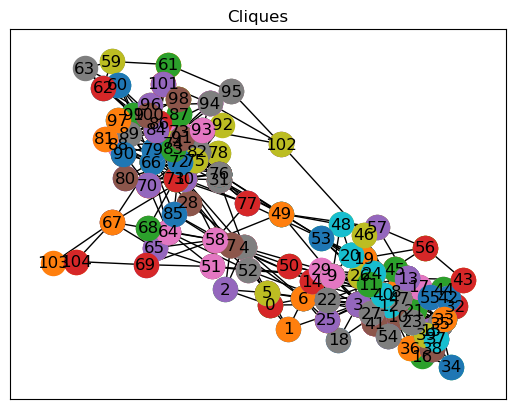

In [13]:
plt.figure()
pos = nx.spring_layout(G)
for i, clique in enumerate(cliques):
    nx.draw_networkx_nodes(G, pos, nodelist=clique, node_color=f"C{i}", label=f"Clique {i+1}")
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.title("Cliques")
plt.show()

## DETECTING AND VISUALIZING COMMUNITIES WITH CLIQUES

In [14]:
def detect_communities(graph):
    cliques = list(nx.find_cliques(graph))
    communities = []
    for clique in cliques:
        found = False
        for community in communities:
            if any(node in community for node in clique):
                community.extend(clique)
                found = True
                break
        if not found:
            communities.append(clique)
    return communities

In [15]:
communities = detect_communities(G)

print("Communities:")
for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")

Communities:
Community 1: [0, 5, 1, 3, 0, 5, 1, 6, 0, 5, 2, 4, 0, 5, 4, 6, 2, 7, 5, 4, 28, 4, 29, 6, 4, 30, 31, 5, 7, 6, 6, 12, 10, 6, 12, 18, 6, 22, 25, 7, 58, 85, 7, 58, 14, 7, 58, 30, 7, 71, 8, 35, 37, 10, 8, 37, 33, 10, 8, 42, 13, 40, 8, 42, 13, 43, 8, 12, 32, 33, 23, 8, 12, 32, 13, 8, 12, 33, 10, 8, 12, 3, 24, 9, 8, 12, 3, 11, 9, 14, 8, 12, 3, 11, 10, 8, 12, 3, 11, 13, 8, 12, 3, 23, 8, 12, 40, 24, 8, 12, 40, 41, 8, 12, 40, 44, 13, 8, 12, 41, 9, 8, 12, 46, 8, 45, 9, 11, 8, 45, 26, 40, 8, 45, 26, 11, 8, 20, 40, 24, 8, 20, 3, 9, 24, 8, 20, 3, 9, 11, 8, 21, 3, 10, 11, 8, 21, 3, 23, 8, 22, 40, 8, 22, 11, 3, 8, 26, 40, 24, 8, 26, 3, 24, 8, 26, 3, 11, 14, 8, 27, 40, 41, 8, 27, 41, 9, 8, 27, 3, 9, 11, 8, 27, 3, 23, 15, 10, 3, 16, 15, 10, 3, 12, 15, 10, 55, 12, 17, 11, 12, 13, 3, 17, 11, 12, 13, 47, 18, 3, 12, 19, 10, 3, 19, 10, 55, 19, 77, 25, 40, 22, 25, 3, 14, 25, 3, 22, 28, 72, 66, 29, 11, 13, 30, 66, 67, 30, 66, 70, 30, 66, 73, 99, 74, 84, 30, 66, 73, 99, 93, 30, 66, 73, 86, 84, 30, 6

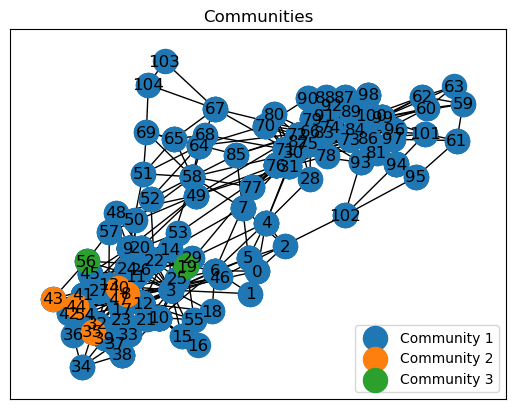

In [16]:
plt.figure()
pos = nx.spring_layout(G)
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=f"C{i}", label=f"Community {i+1}")
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.title("Communities")
plt.legend()
plt.show()

## FINDING COMMUNITIES WITH CPM COMMUNITY DETECTION ALGORITHM

The CPM (Clique Percolation Method) algorithm is a community detection algorithm that identifies communities based on the formation of cliques within a network. The basic idea of the CPM algorithm is to find overlapping communities by identifying k-cliques (subgraphs where each node is connected to every other node) and then merging the cliques that share at least k-1 nodes.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

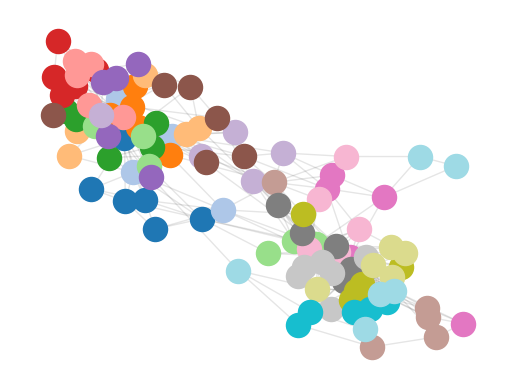

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

def cpm_community_detection(G, k):
    node_to_clique = {}
    for node in G.nodes():
        node_neighbors = set(G.neighbors(node))
        for clique in node_to_clique.values():
            if len(clique.intersection(node_neighbors)) >= k-1:
                clique.add(node)
                break
        else:
            new_clique = set()
            new_clique.add(node)
            node_to_clique[node] = new_clique

    communities = []
    for clique in node_to_clique.values():
        communities.append(clique)

    return communities

# Detect communities using CPM with minimum clique size 3
communities = cpm_community_detection(G, 3)

# Generate colors for each community
colors = plt.cm.get_cmap('tab20', len(communities))

# Visualize the graph with communities
pos = nx.spring_layout(G)
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, node_color=colors(i), nodelist=list(community))
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.axis('off')
plt.show()


## FINDING COMMUNITIES WITH LOUVAIN COMMUNITY DETECTION ALGORITHM

The Louvain algorithm is a widely used community detection algorithm that aims to maximize the modularity of a network by iteratively optimizing the partition of nodes into communities. It is known for its effectiveness in detecting both non-overlapping and overlapping communities in large-scale networks. 

The Louvain algorithm maximizes the modularity metric, which measures the quality of the partition by evaluating the density of edges within communities compared to the expected density in a random network. By optimizing modularity, the algorithm aims to identify the most cohesive and well-connected communities in the network.

The Louvain algorithm is known for its efficiency and scalability, making it suitable for analyzing large-scale networks. It provides a flexible approach to community detection, capable of capturing both non-overlapping and overlapping communities.

In [18]:
#pip install python-louvain

In [19]:
import community
partition = community.best_partition(G)
print("Communities:")
for i, community in enumerate(partition):
    print(f"Community {i+1}: {community}")

Communities:
Community 1: 1
Community 2: 0
Community 3: 2
Community 4: 3
Community 5: 4
Community 6: 5
Community 7: 6
Community 8: 7
Community 9: 8
Community 10: 9
Community 11: 10
Community 12: 11
Community 13: 12
Community 14: 13
Community 15: 14
Community 16: 15
Community 17: 16
Community 18: 17
Community 19: 18
Community 20: 19
Community 21: 20
Community 22: 21
Community 23: 22
Community 24: 23
Community 25: 24
Community 26: 25
Community 27: 26
Community 28: 27
Community 29: 28
Community 30: 29
Community 31: 30
Community 32: 31
Community 33: 32
Community 34: 33
Community 35: 35
Community 36: 34
Community 37: 36
Community 38: 37
Community 39: 38
Community 40: 39
Community 41: 40
Community 42: 41
Community 43: 42
Community 44: 43
Community 45: 44
Community 46: 45
Community 47: 46
Community 48: 47
Community 49: 48
Community 50: 49
Community 51: 50
Community 52: 51
Community 53: 52
Community 54: 53
Community 55: 54
Community 56: 55
Community 57: 56
Community 58: 57
Community 59: 58
Com

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

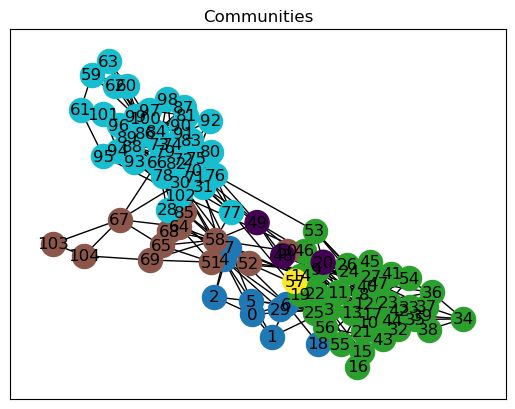

In [20]:
pos = nx.spring_layout(G)
max_community = max(partition.values()) + 1
colors = plt.cm.get_cmap('tab10', max_community)

# Step 4: Visualize communities
plt.figure()
for community_id in set(partition.values()):
    nodes = [node for node, comm in partition.items() if comm == community_id]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors(community_id))

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.title("Communities")
plt.show()

## FINDING COMMUNITIES WITH Label Propagation Algorithm (LPA) COMMUNITY DETECTION ALGORITHM

The Label Propagation Algorithm (LPA) is a community detection algorithm that assigns labels (community affiliations) to nodes in a network based on the consensus of their neighboring nodes. 

The LPA algorithm operates on the principle that nodes tend to adopt the most popular label among their neighbors. As labels propagate through the network, communities emerge based on the consensus among neighboring nodes. The algorithm can identify both non-overlapping and overlapping communities, as nodes can potentially have multiple labels if their neighbors belong to different communities.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


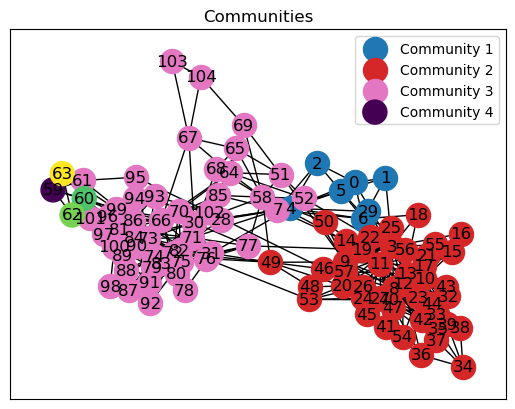

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

def detect_communities_lpa(graph):
    # Perform community detection using Label Propagation Algorithm (LPA)
    communities = nx.algorithms.community.label_propagation.label_propagation_communities(graph)
    return communities

def visualize_communities(graph, communities):
    plt.figure()
    pos = nx.spring_layout(graph)
    colors = plt.cm.get_cmap('tab10', len(communities))  # Generate a colormap with the number of communities

    for i, community in enumerate(communities):
        nx.draw_networkx_nodes(graph, pos, nodelist=list(community), node_color=colors(i), label=f"Community {i+1}")

    nx.draw_networkx_edges(graph, pos)
    nx.draw_networkx_labels(graph, pos)
    plt.title("Communities")
    plt.legend()
    plt.show()

# Step 2: Detect communities using Label Propagation Algorithm (LPA)
communities = detect_communities_lpa(G)

# Step 3: Visualize communities
visualize_communities(G, communities)
